## Creating labelled dataset for SME

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
import seaborn as sns

In [2]:
# Reading into the train dataset

train = pd.read_csv("Train_SME.csv")
print(train.head())

   Stemming, m  Charge Per Hole  Average Spacing, m  Average Burden, m
0         3.50         13.47158                 5.7                4.5
1         3.50         13.03500                 5.6                4.5
2         3.75         12.91026                 5.5                4.5
3         3.75         12.91026                 5.5                4.5
4         3.75         12.91026                 5.6                4.5


In [3]:
print(train.describe())

       Stemming, m  Charge Per Hole  Average Spacing, m  Average Burden, m
count   115.000000       115.000000          115.000000         115.000000
mean      3.442174        10.090972            4.907391           3.866087
std       0.497476         3.172662            0.782378           0.728027
min       2.600000         5.482895            3.700000           2.800000
25%       2.950000         6.256757            4.000000           3.000000
50%       3.500000        12.106220            5.400000           4.300000
75%       3.900000        12.798000            5.550000           4.500000
max       4.300000        14.145160            6.000000           4.500000


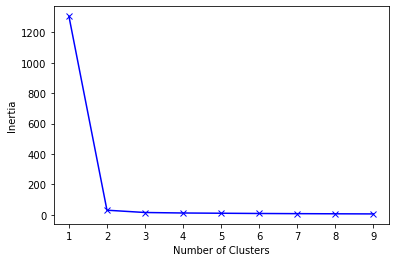

In [4]:
# Applying Elbow Method

inertia = []
for k in range(1, 10):
    kmeanModel = KMeans(n_clusters = k).fit(train)
    kmeanModel.fit(train)
    inertia.append(kmeanModel.inertia_)

plt.plot(range(1, 10), inertia, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

### Thus we take the number of clusters (n_clusters) = 2

In [5]:
# Applying KMeans 

kmeans = KMeans(n_clusters = 2).fit(train)

In [6]:
# Adding the labels column to training dataset

labels = pd.DataFrame(kmeans.labels_)
labeled_train = pd.concat((train,labels),axis=1)
labeled_train = labeled_train.rename({0:'clusters'},axis=1)

In [7]:
print(labeled_train.head(10))

   Stemming, m  Charge Per Hole  Average Spacing, m  Average Burden, m  \
0         3.50         13.47158                 5.7                4.5   
1         3.50         13.03500                 5.6                4.5   
2         3.75         12.91026                 5.5                4.5   
3         3.75         12.91026                 5.5                4.5   
4         3.75         12.91026                 5.6                4.5   
5         4.25         11.78763                 5.4                4.5   
6         3.80         12.79800                 5.3                4.5   
7         3.60         13.02859                 5.3                4.5   
8         3.50         13.25919                 5.4                4.5   
9         3.20         14.14516                 5.5                4.5   

   clusters  
0         0  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         0  
8         0  
9         0  


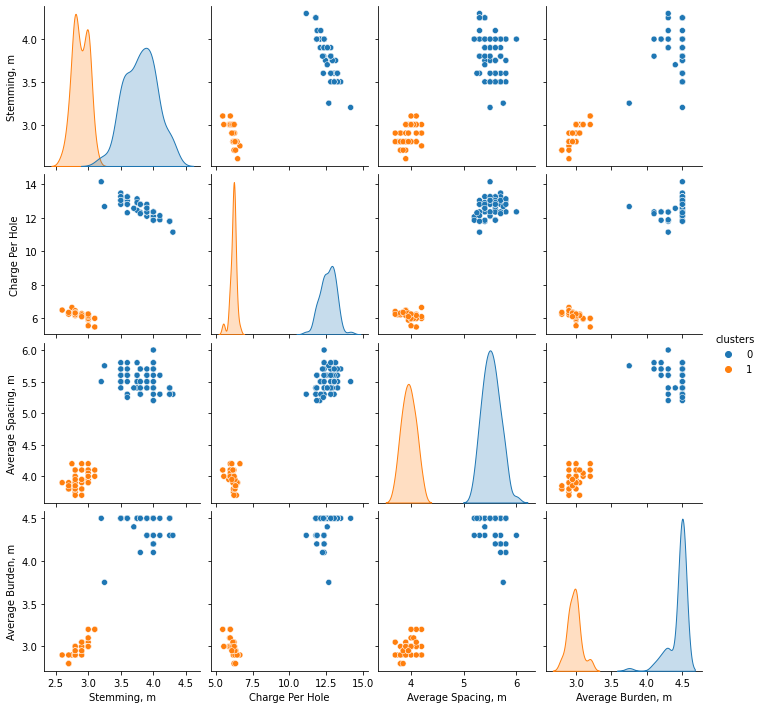

In [8]:
sns.pairplot(labeled_train,hue='clusters')
plt.show()

In [9]:
# Reading into the test dataset

test = pd.read_csv("Test_SME.csv")
print(test.describe())

       Stemming, m  Charge Per Hole  Average Spacing, m  Average Burden, m
count    15.000000        15.000000           15.000000          15.000000
mean      3.310000         9.731414            4.753333           3.593333
std       0.363121         2.846853            0.629474           0.537476
min       2.700000         6.182222            4.000000           3.000000
25%       3.050000         6.612713            4.025000           3.125000
50%       3.400000        10.890000            5.000000           3.500000
75%       3.500000        11.980534            5.275000           4.000000
max       4.000000        13.310000            5.500000           4.500000


In [10]:
print(kmeans.predict(test))

[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]


    Stemming, m  Charge Per Hole  Average Spacing, m  Average Burden, m  \
0          3.75        10.890667                5.15               4.00   
1          3.25        12.016552                5.00               3.50   
2          3.50        11.616000                5.50               3.75   
3          3.50        10.890000                5.25               3.50   
4          3.50        11.944516                5.00               3.50   
5          4.00        10.890000                5.00               4.00   
6          3.60        13.067778                5.30               4.50   
7          3.50        13.310000                5.40               4.50   
8          3.40        12.523750                5.50               4.20   
9          2.90         6.551579                4.00               3.00   
10         3.00         6.452632                4.00               3.00   
11         3.10         6.269189                4.00               3.20   
12         2.70         6

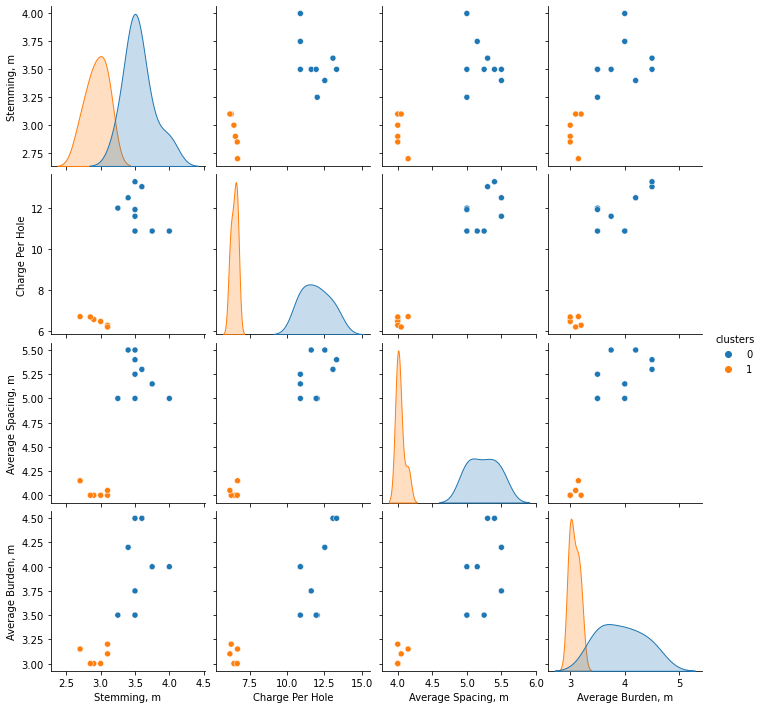

In [11]:
# Adding the labels column to test dataset

labels_test = pd.DataFrame(kmeans.predict(test))
labeled_test = pd.concat((test,labels_test),axis=1)
labeled_test = labeled_test.rename({0:'clusters'},axis=1)
print(labeled_test)
sns.pairplot(labeled_test,hue="clusters")
plt.show()

### Exporting the labelled datasets for furthur processing

In [12]:
labeled_train.to_csv("Train_SME_labelled.csv")

In [13]:
labeled_test.to_csv("Test_SME_labelled.csv")